## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [ ]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi.exe -l 1

In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
import numpy as np
def preproc_x(x, flatten=True):
    for i in range(x.shape[0]):
        x[i,:] = (2 * x[i,:] - (np.max(x[i,:]) + np.min(x[i,:]))) / ((np.max(x[i,:]) - np.min(x[i,:])))
        if flatten:
            x = x.reshape((len(x), -1))
        return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[2048, 1024, 512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290

In [6]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [7]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

In [8]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 196us/step - loss: 61.0093 - acc: 0.2208 - val_loss: 2.0026 - val_acc: 0.2803
Epoch 2/100
50000/50000 [==============================] - 9s 189us/step - loss: 1.8929 - acc: 0.3243 - val_loss: 1.8541 - val_acc: 0.3417
Epoch 3/100
50000/50000 [==============================] - 10s 195us/step - loss: 1.8044 - acc: 0.3555 - val_loss: 1.7391 - val_acc: 0.3752
Epoch 4/100
50000/50000 [==============================] - 10s 201us/step - loss: 1.7281 - acc: 0.3852 - val_loss: 1.7104 - val_acc: 0.3934
Epoch 5/100
50000/50000 [==============================] - 10s 202us/step - loss: 1.6722 - acc: 0.4061 - val_loss: 1.6727 - val_acc: 0.4036
Epoch 6/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.6270 - acc: 0.4230 - val_loss: 1.6312 - val_acc: 0.4210
Epoch 7/100
50000/50000 [==============================] - 10s 207us/step - loss: 1.5998 - acc: 0.4321 - val_l

Epoch 59/100
50000/50000 [==============================] - 22s 433us/step - loss: 0.9288 - acc: 0.6687 - val_loss: 1.6136 - val_acc: 0.4979
Epoch 60/100
50000/50000 [==============================] - 31s 628us/step - loss: 0.9330 - acc: 0.6694 - val_loss: 1.6761 - val_acc: 0.4969
Epoch 61/100
50000/50000 [==============================] - 30s 604us/step - loss: 0.9091 - acc: 0.6782 - val_loss: 1.7202 - val_acc: 0.4895
Epoch 62/100
50000/50000 [==============================] - 20s 406us/step - loss: 0.9065 - acc: 0.6777 - val_loss: 1.6985 - val_acc: 0.4989
Epoch 63/100
50000/50000 [==============================] - 31s 617us/step - loss: 0.9158 - acc: 0.6756 - val_loss: 1.6336 - val_acc: 0.5077
Epoch 64/100
50000/50000 [==============================] - 31s 627us/step - loss: 0.8860 - acc: 0.6852 - val_loss: 1.6995 - val_acc: 0.5051
Epoch 65/100
50000/50000 [==============================] - 28s 566us/step - loss: 0.8633 - acc: 0.6928 - val_loss: 1.7552 - val_acc: 0.5028
Epoch 66/100


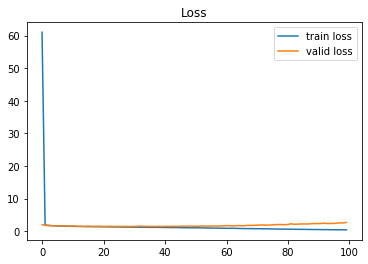

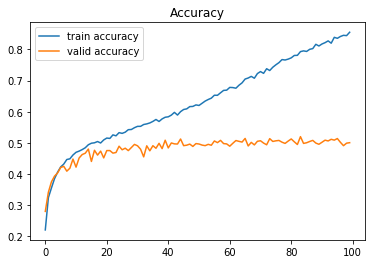

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()